# Fire up GraphLab Create

In [10]:
import os, sys
import graphlab as gl
import graphlab.aggregate as agg
from tqdm import tqdm_notebook as tqdm

# set canvas path
# gl.canvas.set_target('ipynb')

%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales = graphlab.SFrame('data/home_data.gl/')

In [4]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# Exploring the housing data

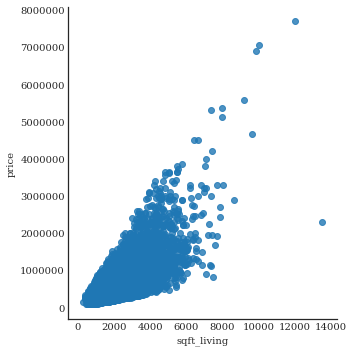

In [21]:
sns.lmplot(
    x='sqft_living', 
    y='price', 
    data=sales.to_dataframe(),
    fit_reg=False
) # No regression line

# Create a simple regression model for sqft_living v/s price

In [22]:
train_dataset, test_dataset = sales.random_split(.8, seed=0)

## Build the regression model

In [23]:
sqft_model = gl.linear_regression.create(train_dataset, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16504

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.019042     | 4339516.943264     | 2188851.651762       | 263867.766557 | 245002.587300   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

# Evaluate the simple model

In [24]:
print test_dataset['price'].mean()

543054.042563


In [25]:
print sqft_model.evaluate(test_dataset)

{'max_error': 4135742.0156262554, 'rmse': 255217.65264040514}


## Let's show what our predictions look like

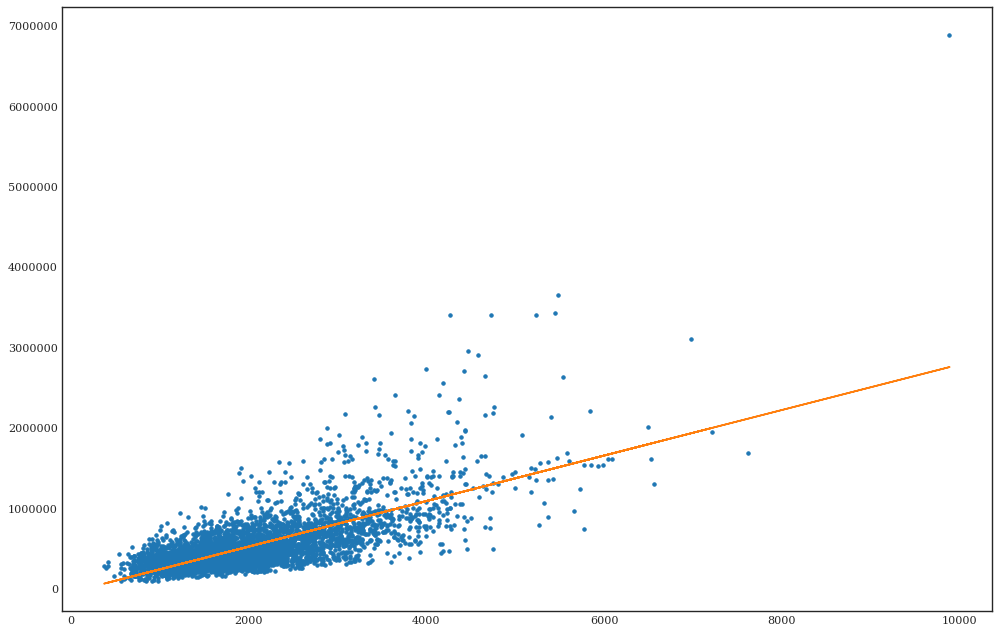

In [28]:
plt.figure(num=1, figsize=(15, 10), dpi=80)
axis_to_work = plt
axis_to_work.plot(
    test_dataset['sqft_living'], test_dataset['price'], '.',
    test_dataset['sqft_living'], sqft_model.predict(test_dataset), '-'
)
axis_to_work.show()
sns.despine(top=True, right=True)

In [29]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-49360.5182486,5067.96586006
sqft_living,None,282.974570538,2.22681358438


# Explore other data

In [30]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

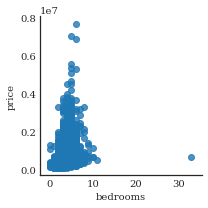

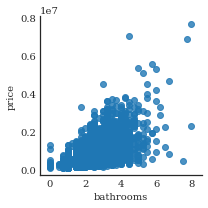

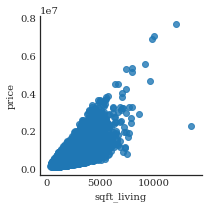

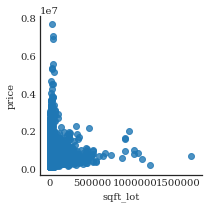

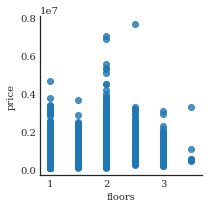

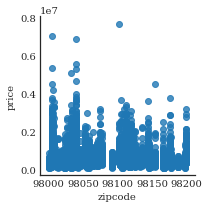

In [37]:
for feature in my_features:
    sns.lmplot(
        x=feature, 
        y='price', 
        data=sales.to_dataframe(),
        fit_reg=False,
        size=3
    ) # No regression line

# Build a regression model with more features

In [38]:
my_features_model = graphlab.linear_regression.create(train_dataset, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16570

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.044279     | 3735626.228581     | 2403965.314758       | 182225.739569 | 179119.117641   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [39]:
print sqft_model.evaluate(test_dataset)
print my_features_model.evaluate(test_dataset)

{'max_error': 4135742.0156262554, 'rmse': 255217.65264040514}
{'max_error': 3478192.9233220695, 'rmse': 179419.95041878804}


# Apply learned model to 3 different houses of the dataset

In [40]:
house1 = sales[sales['id'] == '5309101200']

In [41]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<h1> Testing HTML </h1>

In [42]:
print house1['price']

[620000, ... ]


In [43]:
print sqft_model.predict(house1)

[629778.4510429727]


In [44]:
print my_features_model.predict(house1)

[720794.3789045558]


## Prediction for a second fancier house

In [45]:
house2 = sales[sales['id'] == '1925069082']

In [46]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [47]:
print house2['price']

[2200000, ... ]


In [48]:
print sqft_model.predict(house2)

[1263641.4890484374]


In [49]:
print my_features_model.predict(house2)

[1438109.484222055]


## Even more fancier house

In [50]:
# it was Bill Gates house

In [55]:
house3 = sales[sales['id']=='5309101200']

In [56]:
house3

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [57]:
print house2['price']

[2200000]


In [58]:
print sqft_model.predict(house2)

[1263641.4890484374]


In [59]:
print my_features_model.predict(house2)

[1438109.484222055]
